# Theme Park Review Analysis

## by Justin Sierchio

In this analysis, we will be looking at reviews from 3 Disneyland(R) parks in California, Paris and Hong Kong as they were posted on Trip Advisor. We would like to be able to answer the following questions:

<ul>
    <li>Which park had the best reviews?</li>
    <li>What was the most common complaint?</li>
    <li>What are some other conclusions we might able to draw from this analysis?</li>
</ul>

This data is in .csv file format and is from Kaggle at: https://www.kaggle.com/arushchillar/disneyland-reviews/download. More information related to the dataset can be found at: https://www.kaggle.com/arushchillar/disneyland-reviews.

## Notebook Initialization

In [1]:
# Import Relevant Libraries
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
import datetime

print('Initial libraries loaded into workspace!')

Initial libraries loaded into workspace!


In [2]:
# Upload Datasets for reviews
df_REVIEWS = pd.read_csv("DisneylandReviews.csv");

print('Datasets uploaded!');

Datasets uploaded!


In [3]:
# Display 1st 5 rows from Theme Park review set
df_REVIEWS.head()

,Review_ID,Rating,Year_Month,Reviewer_Location,Review_Text,Branch
0,670772142,4,2019-4,Australia,If you've ever been to Disneyland anywhere you...,Disneyland_HongKong
1,670682799,4,2019-5,Philippines,Its been a while since d last time we visit HK...,Disneyland_HongKong
2,670623270,4,2019-4,United Arab Emirates,Thanks God it wasn t too hot or too humid wh...,Disneyland_HongKong
3,670607911,4,2019-4,Australia,HK Disneyland is a great compact park. Unfortu...,Disneyland_HongKong
4,670607296,4,2019-4,United Kingdom,"the location is not in the city, took around 1...",Disneyland_HongKong


Let's briefly list the column titles and their descriptions:

<ul>
    <li> Review_ID: ID given to each entry </li>
    <li> Rating: range of 1 to 5, 1 being bad and 5 being great </li>
    <li> Year_Month: date when reviewer visited park </li>
    <li> Reviewer_Location: where reviewed is located </li>
    <li> Review_Text: visitor comments </li>
    <li> Disneyland_Branch: which location of Disneyland Park reviewed?</li>
</ul>

# Data Cleaning

Let's begin by looking at the data types.

In [4]:
# View data types in dataset
df_REVIEWS.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42656 entries, 0 to 42655
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Review_ID          42656 non-null  int64 
 1   Rating             42656 non-null  int64 
 2   Year_Month         42656 non-null  object
 3   Reviewer_Location  42656 non-null  object
 4   Review_Text        42656 non-null  object
 5   Branch             42656 non-null  object
dtypes: int64(2), object(4)
memory usage: 2.0+ MB


Let's take a look at an 'NaN' values we might have and (depending on the number) removing them from the dataset.

In [5]:
# View 'NaN' values and removing them (if applicable)
df_REVIEWS.isnull().sum()

Review_ID            0
Rating               0
Year_Month           0
Reviewer_Location    0
Review_Text          0
Branch               0
dtype: int64

Let's begin by converting the 'Year_Month' info into separate columns.

In [6]:
# Convert 'Year_Month' into separate columns
df_REVIEWS["Year_Month"] = pd.to_datetime(df_REVIEWS["Year_Month"], errors='coerce')

In [7]:
df_REVIEWS["Year"] = df_REVIEWS["Year_Month"].dt.year
df_REVIEWS["Month"] = df_REVIEWS["Year_Month"].dt.month

In [8]:
df_REVIEWS.head()

,Review_ID,Rating,Year_Month,Reviewer_Location,Review_Text,Branch,Year,Month
0,670772142,4,2019-04-01,Australia,If you've ever been to Disneyland anywhere you...,Disneyland_HongKong,2019.0,4.0
1,670682799,4,2019-05-01,Philippines,Its been a while since d last time we visit HK...,Disneyland_HongKong,2019.0,5.0
2,670623270,4,2019-04-01,United Arab Emirates,Thanks God it wasn t too hot or too humid wh...,Disneyland_HongKong,2019.0,4.0
3,670607911,4,2019-04-01,Australia,HK Disneyland is a great compact park. Unfortu...,Disneyland_HongKong,2019.0,4.0
4,670607296,4,2019-04-01,United Kingdom,"the location is not in the city, took around 1...",Disneyland_HongKong,2019.0,4.0


Now let's assess how many 'NaN' or missing values we may have in this dataset.

In [9]:
# Assess 'NaN' values in dataset
df_REVIEWS.isnull().sum()/len(df_REVIEWS)

Review_ID            0.000000
Rating               0.000000
Year_Month           0.061258
Reviewer_Location    0.000000
Review_Text          0.000000
Branch               0.000000
Year                 0.061258
Month                0.061258
dtype: float64

Since those values are less than 1 in 16 reviews, we will just remove them for simplicity.

In [10]:
# Remove 'NaN' values
df_REVIEWS.dropna(inplace=True)

# Show updated dataset
df_REVIEWS.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40043 entries, 0 to 42117
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Review_ID          40043 non-null  int64         
 1   Rating             40043 non-null  int64         
 2   Year_Month         40043 non-null  datetime64[ns]
 3   Reviewer_Location  40043 non-null  object        
 4   Review_Text        40043 non-null  object        
 5   Branch             40043 non-null  object        
 6   Year               40043 non-null  float64       
 7   Month              40043 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(2), object(3)
memory usage: 2.7+ MB


The last step we want to engage in with data cleaning is removing any duplicates.

In [11]:
# Remove duplicates from dataset
df_REVIEWS.drop_duplicates(subset="Review_ID",inplace=True, keep="first")

# Show updated dataset
df_REVIEWS.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40023 entries, 0 to 42117
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Review_ID          40023 non-null  int64         
 1   Rating             40023 non-null  int64         
 2   Year_Month         40023 non-null  datetime64[ns]
 3   Reviewer_Location  40023 non-null  object        
 4   Review_Text        40023 non-null  object        
 5   Branch             40023 non-null  object        
 6   Year               40023 non-null  float64       
 7   Month              40023 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(2), object(3)
memory usage: 2.7+ MB


As we can see, 20 reviews have been removed as duplicates. We should be good to go for our exploratory data analysis.

# Exploratory Data Analysis

Let's begin our analysis by the range of ratings for the Disneyland theme parks.

Text(0.5, 1.0, 'Histogram of Disneyland Review Ratings')

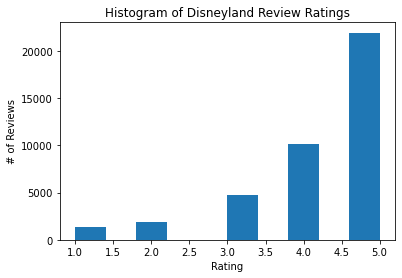

In [12]:
# Create a histogram showing ratings for the Disneyland theme parks' dataset
plt.hist(df_REVIEWS['Rating'], bins = 10)
plt.xlabel('Rating')
plt.ylabel('# of Reviews')
plt.title('Histogram of Disneyland Review Ratings')

As we can see, the vast majority of ratings are in the 4.0+ range. Let's take a look at where the reviews are coming from (in terms of which Disneyland branches).

Text(0.5, 1.0, 'Histogram of Disneyland Review Ratings by Branch')

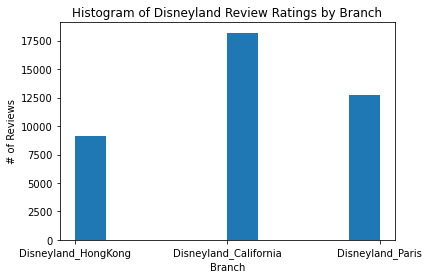

In [13]:
# Create a histogram showing where the reviews come from for each Disneyland branch
plt.hist(df_REVIEWS['Branch'], bins = 10)
plt.xlabel('Branch')
plt.ylabel('# of Reviews')
plt.title('Histogram of Disneyland Review Ratings by Branch')

Here we see a plurality of the reviews are at the California park, followed by Paris and then Hong Kong. At this point, it would be useful to see the range of years that the parks have been reviewed.

Text(0.5, 1.0, 'Histogram of Disneyland Reviews by Year')

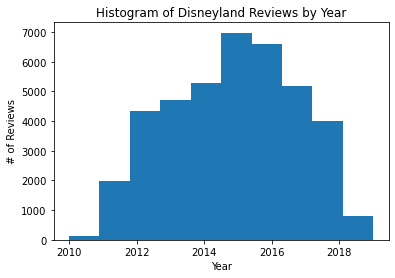

In [14]:
# Create a histogram showing the years for which there are Disneyland reviews in the dataset
plt.hist(df_REVIEWS['Year'], bins = 10)
plt.xlabel('Year')
plt.ylabel('# of Reviews')
plt.title('Histogram of Disneyland Reviews by Year')

It appears the bulk of the reviews are between 2014 and 2016.